In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from DataProcessing import DataProcessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# lendo os dados já processados 
dados = DataProcessing()
dados.shape

(13455, 6)

In [3]:
# separando os dados entre treinamento e teste
X, y = dados[:, :5], dados[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
X_train.shape

(12109, 5)

In [5]:
# creating the random forest
random_forest = RandomForestRegressor(n_estimators=150, min_samples_leaf=30, max_depth=5, oob_score=True, random_state=0)

random_forest.fit(X_train, y_train)
print("oob score: ", random_forest.oob_score_)
print("feature importance: ", random_forest.feature_importances_)

oob score:  0.4969139154321287
feature importance:  [0.00143867 0.8086539  0.15655778 0.03027878 0.00307087]


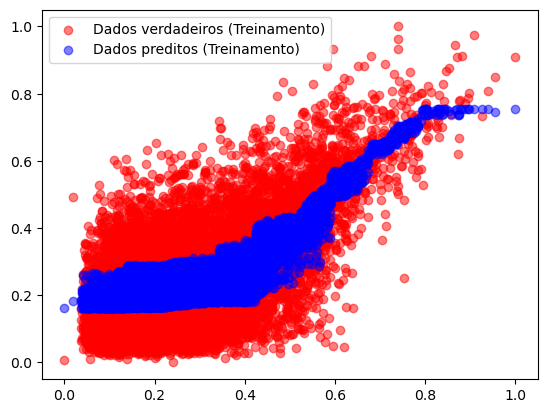

In [6]:
# Predicão no conjunto de treino
y_predict = random_forest.predict(X_train)
plt.scatter(X_train[:, 1], y_train, color='red', label='Dados verdadeiros (Treinamento)', alpha=0.5)
plt.scatter(X_train[:, 1], y_predict, color='blue', label='Dados preditos (Treinamento)', alpha=0.5)
plt.legend(loc='best')

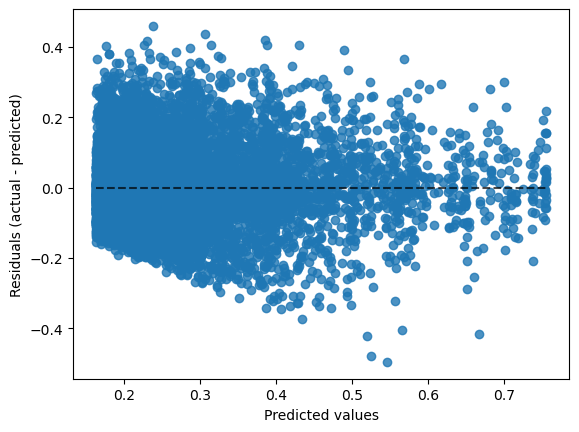

In [7]:
# Para notas mais baixas e mais altas, o modelo está subsestimando as notas dos alunos
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_predict)
display.plot()

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R^2 = ', r2_score(y_train, y_predict))
print('MSE = ', mean_squared_error(y_train, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_train, axis=0))
print('MAE = ', mean_absolute_error(y_train, y_predict))

R^2 =  0.5156828675389434
MSE =  0.010227648994150929  média (predito) = 0.25690955473057653  média (treinamento) = 0.25694999766896975
MAE =  0.07558635664350823


In [9]:
y_predict = random_forest.predict(X_test)

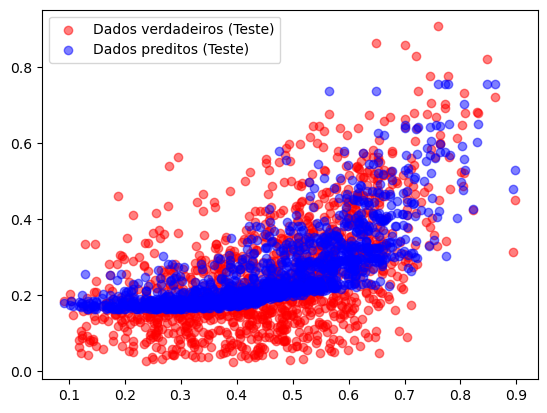

In [10]:
# Predicão no conjunto de teste
plt.scatter(X_test[:, 3], y_test, color='red', label='Dados verdadeiros (Teste)', alpha=0.5)
plt.scatter(X_test[:, 3], y_predict, color='blue', label='Dados preditos (Teste)', alpha=0.5)
plt.legend(loc='best')

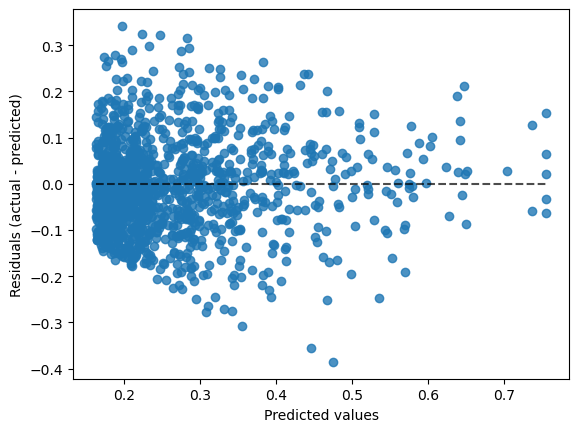

In [11]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_predict)
display.plot()

In [12]:
print('R^2 = ', r2_score(y_test, y_predict))
print('MSE = ', mean_squared_error(y_test, y_predict), " média (predito) =", np.mean(y_predict, axis=0),
      " média (treinamento) =", np.mean(y_test, axis=0))
print('MAE = ', mean_absolute_error(y_test, y_predict))

R^2 =  0.5399901252994097
MSE =  0.009904189589666839  média (predito) = 0.2617496781920706  média (treinamento) = 0.2567313608604245
MAE =  0.0762884927489827
